In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from tqdm import tqdm_notebook as tqdm

from functions import reduce_mem_usage
from visualize import show_transaction_nans

# Load Data for the First Time, Reduce Memory, Save as .pkl

In [3]:
df_train_trans = pd.read_csv(os.path.abspath(os.path.join(os.getcwd(), 'data', 'train_transaction.csv')))
df_train_trans = reduce_mem_usage(df_train_trans)
df_train_trans.to_pickle('data/df_train_trans.pkl')

Mem. usage decreased to 542.35 Mb (69.4% reduction)


In [4]:
df_train_id = pd.read_csv(os.path.abspath(os.path.join(os.getcwd(), 'data', 'train_identity.csv')))
df_train_id = reduce_mem_usage(df_train_id)
df_train_id.to_pickle('data/df_train_id.pkl')

Mem. usage decreased to 25.86 Mb (42.7% reduction)


In [5]:
df_test_trans = pd.read_csv(os.path.abspath(os.path.join(os.getcwd(), 'data', 'test_transaction.csv')))
df_test_trans = reduce_mem_usage(df_test_trans)
df_test_trans.to_pickle('data/df_test_trans.pkl')

Mem. usage decreased to 472.59 Mb (68.9% reduction)


In [6]:
df_test_id = pd.read_csv(os.path.abspath(os.path.join(os.getcwd(), 'data', 'test_identity.csv')))
df_test_id = reduce_mem_usage(df_test_id)
df_test_id.to_pickle('data/df_test_id.pkl')

Mem. usage decreased to 25.44 Mb (42.7% reduction)


# Load Mem-reduced Data form .pkl files

In [3]:
df_train_trans = pd.read_pickle(os.path.abspath(os.path.join(os.getcwd(), 'data', 'df_train_trans.pkl')))
df_train_id = pd.read_pickle(os.path.abspath(os.path.join(os.getcwd(), 'data', 'df_train_id.pkl')))
df_test_trans = pd.read_pickle(os.path.abspath(os.path.join(os.getcwd(), 'data', 'df_test_trans.pkl')))
df_test_id = pd.read_pickle(os.path.abspath(os.path.join(os.getcwd(), 'data', 'df_test_id.pkl')))

# 1. Transactions

In [75]:
df_train_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float16(332), float32(44), int16(1), int32(2), int8(1), object(14)
memory usage: 542.3+ MB


In [76]:
df_test_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 393 entries, TransactionID to V339
dtypes: float16(324), float32(52), int16(1), int32(2), object(14)
memory usage: 472.6+ MB


In [77]:
df_train_trans.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [79]:
df_test_trans.isna().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
                   ...  
V335              430260
V336              430260
V337              430260
V338              430260
V339              430260
Length: 393, dtype: int64

## Num of NaNs

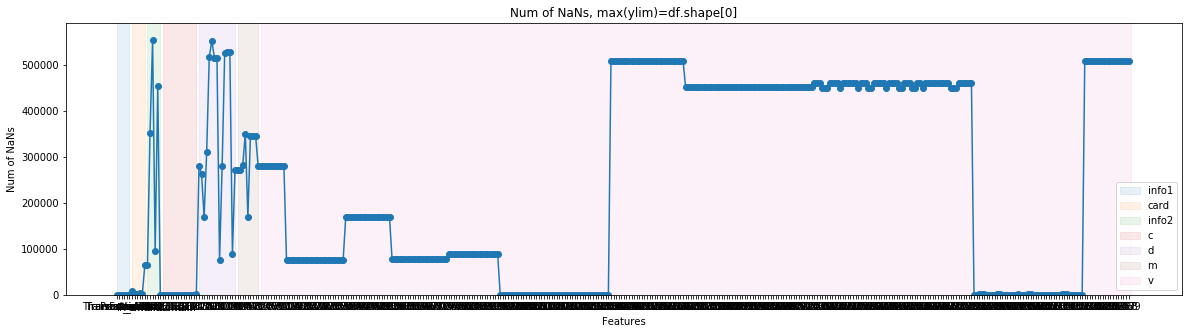

In [85]:
show_transaction_nans(df_train_trans)

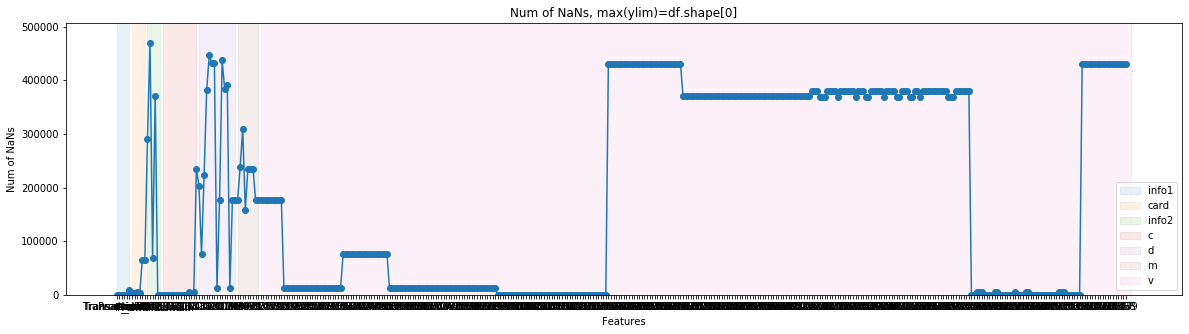


====info1
Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1'],
      dtype='object')

====card
Index(['card3', 'card4', 'card5', 'card6', 'addr1'], dtype='object')

====info2
Index(['dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1'], dtype='object')

====c
Index(['C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
       'C14', 'D1'],
      dtype='object')

====d
Index(['D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13',
       'D14', 'D15', 'M1'],
      dtype='object')

====m
Index(['M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1'], dtype='object')

====v
Index(['V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=337)


In [86]:
show_transaction_nans(df_test_trans, print_columns=True)

<BarContainer object of 2 artists>

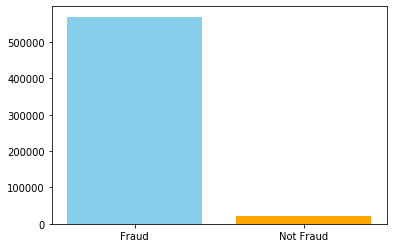

In [18]:
plt.bar(['Fraud','Not Fraud'], df_train_trans['isFraud'].value_counts(), color=['skyblue', 'orange'])

# 2. ID

In [5]:
df_train_trans.shape

(590540, 394)

In [6]:
df_train_id.shape

(144233, 41)

In [7]:
df_train_trans.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_train_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [9]:
df_test_trans.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.953125,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,285.000000,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.937500,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_test_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [4]:
df_train_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int32
id_01            144233 non-null float16
id_02            140872 non-null float32
id_03            66324 non-null float16
id_04            66324 non-null float16
id_05            136865 non-null float16
id_06            136865 non-null float16
id_07            5155 non-null float16
id_08            5155 non-null float16
id_09            74926 non-null float16
id_10            74926 non-null float16
id_11            140978 non-null float16
id_12            144233 non-null object
id_13            127320 non-null float16
id_14            80044 non-null float16
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float16
id_18            45113 non-null float16
id_19            139318 non-null float16
id_20            139261 non-null float16
id_21            5159 non-null float16
id_2

In [11]:
df_train_id.isna().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [12]:
df_test_id.isna().sum()

TransactionID         0
id_01                 0
id_02              4931
id_03             75426
id_04             75426
id_05              7157
id_06              7157
id_07            136848
id_08            136848
id_09             67569
id_10             67569
id_11              5129
id_12                 0
id_13             11621
id_14             70550
id_15              4930
id_16             16160
id_17              5941
id_18             91032
id_19              6001
id_20              6274
id_21            136848
id_22            136845
id_23            136845
id_24            137167
id_25            136868
id_26            136860
id_27            136845
id_28              5129
id_29              5129
id_30             71248
id_31              5282
id_32             71236
id_33             71236
id_34             69732
id_35              4930
id_36              4930
id_37              4930
id_38              4930
DeviceType         4976
DeviceInfo        26850
dtype: int64